<a href="https://colab.research.google.com/github/MaCuur/AI_EGs/blob/main/LSTM_eg_with_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LSTM with python

Exaple to predict sentiment of movie reviews from the IMDB data set
https://www.alpha-quantum.com/blog/long-short-term-memory-lstm-with-python/long-short-term-memory-lstm-with-python/

In [1]:
import pandas as pd

import numpy as np

import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,accuracy_score,f1_score,roc_curve

from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras.layers import Activation, Dense, Dropout, Embedding, LSTM

import re

from IPython.display import display

import os

import string

import time

import random

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb

random.seed(10)

IMPORTING DATA

In [2]:
num_words = 5000

( X_train , y_train ),( X_test , y_test ) = imdb.load_data(num_words = 5000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
sequence_length = 300

batch_size = 128

X_train_seq = pad_sequences( X_train, maxlen = sequence_length)

X_test_seq = pad_sequences( X_test, maxlen = sequence_length)

In [4]:
encoder = LabelEncoder()

encoder.fit(y_train)

y_train_transformed = encoder.transform(y_train).reshape(-1,1)

y_test_transformed = encoder.transform(y_test).reshape(-1,1)

lstm

In [17]:
e = Embedding( num_words , 10 , input_length = sequence_length )

model = Sequential()
model.add(e)
model.add(LSTM( 128 , dropout = 0.25, recurrent_dropout = 0.25))
model.add(Dense(1, activation = 'sigmoid' ))

model.summary()

model.compile( optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'] )

early_stopper = EarlyStopping( monitor = 'val_accuracy' , min_delta = 0.0005, patience = 3, mode='max' )
reduce_lr = ReduceLROnPlateau( monitor = 'val_loss' , patience = 2 , cooldown = 0, mode='min')

callbacks = [ reduce_lr , early_stopper]

train_history = model.fit( X_train_seq , y_train_transformed , batch_size = batch_size, epochs = 5,validation_split = 0.1 , verbose = 1 , callbacks = callbacks)

score = model.evaluate( X_test_seq , y_test_transformed , batch_size = batch_size)

print( "Accuracy: {:0.4}".format( score[1] ))
print( "Loss:", score[0] )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 164s 915ms/step - accuracy: 0.6052 - loss: 0.6513 - val_accuracy: 0.7724 - val_loss: 0.5008 - learning_rate: 0.0010
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 199s 900ms/step - accuracy: 0.8100 - loss: 0.4396 - val_accuracy: 0.7904 - val_loss: 0.4505 - learning_rate: 0.0010
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 198s 880ms/step - accuracy: 0.8379 - loss: 0.3817 - val_accuracy: 0.8284 - val_loss: 0.3921 - learning_rate: 0.0010
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 196s 850ms/step - accuracy: 0.8189 - loss: 0.4069 - val_accuracy: 0.8020 - val_loss: 0.4258 - learning_rate: 0.0010
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 149s 846ms/step - accuracy: 0.8515 - loss: 0.3553 - val_accuracy: 0.8260 - val_loss: 0.3879 - learning_rate: 0.0010
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 197ms/step - accuracy: 0.8289 - loss: 0.3877
Accuracy: 0.8326
Loss: 0.38125815987586975


In [18]:
print(' Accuracy: {:0.3}'.format( 100*accuracy_score(y_test_transformed, 1 * (y_pred > 0.5))) )

print(' f1 score: {:0.3}'.format( 100*f1_score( y_test_transformed , 1 * ( y_pred > 0.5))))

print(' ROC AUC: {:0.3}'.format( roc_auc_score( y_test_transformed , y_pred)) )

print( classification_report( y_test_transformed , 1 * ( y_pred > 0.5 ),digits = 3) )

 Accuracy: 83.4
 f1 score: 82.2
 ROC AUC: 0.918
              precision    recall  f1-score   support

           0      0.794     0.902     0.844     12500
           1      0.887     0.766     0.822     12500

    accuracy                          0.834     25000
   macro avg      0.840     0.834     0.833     25000
weighted avg      0.840     0.834     0.833     25000



Train loss, validation loss curves

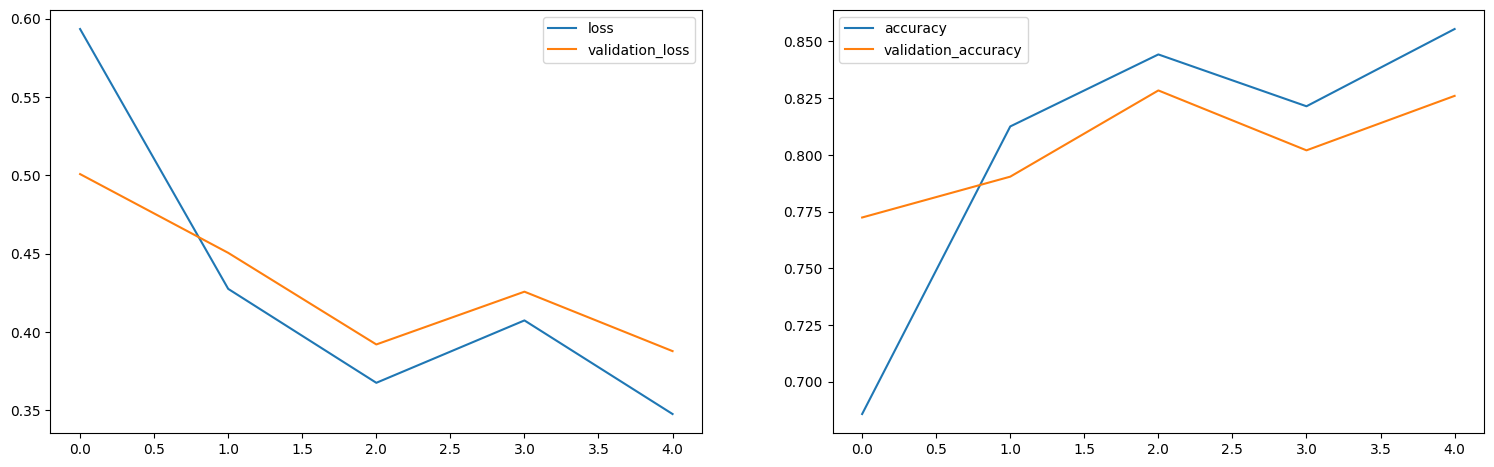

In [19]:
loss = train_history.history['loss']

validation_loss = train_history.history['val_loss']

accuracy = train_history.history['accuracy']

val_accuracy = train_history.history['val_accuracy']

fig = plt.gcf()

fig.set_size_inches(18.5, 5.5)

plt.subplot(1,2,1)

plt.plot(loss)

plt.plot(validation_loss)

plt.legend(['loss', 'validation_loss'])

plt.subplot(1,2,2)

plt.plot(accuracy)

plt.plot(val_accuracy)

plt.legend(['accuracy', 'validation_accuracy'])

plt.show()

In [20]:
y_pred = model.predict(X_test_seq)

782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step


Accuracy: 83.4%: This means that the model correctly predicted whether a review was positive or negative 83.4% of the time on the test set. This is a good overall measure of performance, but it doesn't tell the whole story, especially if your dataset is imbalanced.
F1 Score: 82.2%: The F1 score is the harmonic mean of precision and recall. It provides a balance between these two metrics. An F1 score of 82.2% indicates a reasonably good balance between the model's ability to correctly identify positive reviews (precision) and its ability to find all the positive reviews (recall).
ROC AUC: 0.918: The Receiver Operating Characteristic (ROC) curve plots the true positive rate against the false positive rate at various threshold settings. The Area Under the Curve (AUC) is a measure of the model's ability to distinguish between positive and negative classes. An ROC AUC of 0.918 is very good, suggesting that the model has a high capacity to separate positive and negative reviews. A value of 1.0 would indicate a perfect classifier, while 0.5 would indicate a random classifier.
Classification Report: This report provides a more detailed breakdown of the model's performance for each class (0 and 1, representing negative and positive reviews, respectively).
Precision: For class 0 (negative reviews), the precision is 0.794. This means that when the model predicts a review is negative, it is correct 79.4% of the time. For class 1 (positive reviews), the precision is 0.887, meaning that when the model predicts a review is positive, it is correct 88.7% of the time.
Recall: For class 0, the recall is 0.902. This means that the model correctly identifies 90.2% of all actual negative reviews. For class 1, the recall is 0.766, meaning the model correctly identifies 76.6% of all actual positive reviews.
F1-score: These are the F1 scores for each class, as explained above.
Support: This is the number of actual instances for each class in the test set (12500 for each class).
In summary, the model performs well, with a high ROC AUC indicating strong discriminative power. The accuracy and F1 scores are also good. The classification report shows that the model is slightly better at identifying negative reviews (higher recall for class 0) than positive reviews (lower recall for class 1), but it is more precise when predicting positive reviews (higher precision for class 1).